Bensafi Sarra

In [2]:
from numpy import linalg as LA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import re
import numpy as np
import random
import math
from scipy import linalg



Fonctions Utiles

In [3]:
def initialisationHebb(X,N,etiq):
    
    #Step 1 mettre en place les weights
    W_hebb = np.zeros((N))
    
   

    #Step 3  mettre en place pred
    
    pred=etiq

    for i in range(len(X)):
     
      #Step 4 w(nouveau) = w(vieux) + xi*yi  
      W_hebb=W_hebb+(X[i]*pred[i])

    
    W_hebb=W_hebb/ LA.norm(W_hebb)
  
     
    return W_hebb
########################################
def Stabilite(etiq,W,X):
    
    enum=etiq*np.dot(X,W)
    return enum/linalg.norm(W)
########################################
'''L'erreur de généralisation = l'erreur sur de nouvelles données
    on doit calculer combier y'a t'il de fautes avant
'''
def Error(Etiq , predicted):

  return (Etiq != predicted).sum()

def generalisation(NBtot,NbErr) :
    NbBienClasse=NBtot-NbErr
    return NbBienClasse/NBtot
########################################

def defineTau(X,w):
  tau=[]
  X = np.atleast_2d(X)
  for x in X:
       
       if np.dot(w,x)<=0:
           tau.append(-1)
           
       else:
           tau.append(1)
           
       
  #plt.show
  return tau
########################################
def Stabilite(etiq,W,X):
    
    enum=etiq*np.dot(X,W)
    return enum/linalg.norm(W)
########################################
def plotstab(s):
    plt.hist(s, range=(-0.5, 0.7), bins=10, facecolor='red', alpha=0.5,edgecolor='blue')
    plt.show()

**PARTIE** 1

In [4]:
def Minimerror(X,etiq,W,iterations):
  
  #Parameters
  iterats=0
  betaplus=0.01
  delta=0.01
  alpha=0.01
  
  while iterats<=iterations :
      dW=0
      Wnorm = LA.norm(W)
      for i, (Xi, etiqi) in enumerate(zip(X, etiq)):
              Xi = np.atleast_2d(Xi)
              stab= etiqi * np.dot(Xi, W) / Wnorm 

              dW+=     Xi/      (np.cosh(betaplus*stab/2)**2)*etiqi
              
      dW = - dW * betaplus / 4
      W -=alpha* dW[0]
      betaplus=betaplus+delta
      iterats=iterats+1
  
  return W

In [5]:
'''ET'''
#X et Y
X_= np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
X_= np.insert(X_,0,1,axis=1)
etiq = np.array([[-1], [-1], [-1], [1]])
print(etiq.shape)


N=len(X_[0])

#Weights
W_=initialisationHebb(X_,N,etiq)
W_=W_

Weights_ET=Minimerror(X_,etiq,W_,100)
print(Weights_ET)

etiq_et_MinimError=defineTau(X_,Weights_ET)
print(etiq_et_MinimError)

#Compter les erreurs gen et app
NbErr = Error(etiq.flatten(),etiq_et_MinimError)

Eg=generalisation(4,NbErr)
print("Erreur de généralisation",Eg)
print("Erreur d'apprentissage",NbErr)



#Calculer stabilité
Stab_et=Stabilite(etiq,Weights_ET,X_)
print("Stabilité")
print(Stab_et)

(4, 1)
[-0.79266987  0.79266987  0.79266987]
[-1, -1, -1, 1]
Erreur de généralisation 1.0
Erreur d'apprentissage 0
Stabilité
[[ 1.73205081  0.57735027  0.57735027 -0.57735027]
 [ 1.73205081  0.57735027  0.57735027 -0.57735027]
 [ 1.73205081  0.57735027  0.57735027 -0.57735027]
 [-1.73205081 -0.57735027 -0.57735027  0.57735027]]


Plot de Stabilité


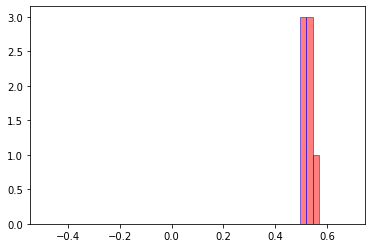

In [6]:
print("Plot de Stabilité")
plotstab(Stab_et)

[2.82530634 2.82530634 2.82530634]
Erreur de généralisation 1.0
Erreur d'apprentissage 0
Stabilité
[[ 0.57735027 -0.57735027 -0.57735027 -1.73205081]
 [ 0.57735027 -0.57735027 -0.57735027 -1.73205081]
 [ 0.57735027 -0.57735027 -0.57735027 -1.73205081]
 [-0.57735027  0.57735027  0.57735027  1.73205081]]
Plot de Stabilité


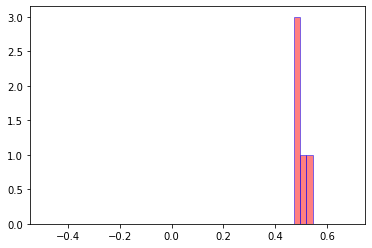

In [7]:
'''ou'''
#X et Y
# construct the OR dataset
X_= np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
X_= np.insert(X_,0,1,axis=1)
etiq_ou = np.array([[-1], [1], [1], [1]])
N=len(X_[0])

#Weights
W_=initialisationHebb(X_,N,etiq_ou)
W_=W_


W_=Minimerror(X_,etiq_ou,W_,1000)
print(W_)
etiqMinimerror = defineTau(X_,W_)


#Compter les erreurs gen et app
NbErr = Error(etiq_ou.flatten(),etiqMinimerror)

Eg=generalisation(4,NbErr)
print("Erreur de généralisation",Eg)
print("Erreur d'apprentissage",NbErr)




#Calculer stabilité
Stab_ou=Stabilite(etiq,W_,X_)
print("Stabilité")
print(Stab_ou)



print("Plot de Stabilité")
plotstab(Stab_ou)

61
Erreur de généralisation 0.9711538461538461
Erreur d'apprentissage 3

Weights sonar
[-1.10851448e+02  1.28409163e+01 -1.71357243e+01 -1.10872430e+00
  4.87817054e+01  2.64959055e+01  2.25324650e+01 -3.24577928e+01
  2.47109839e+01  8.72269336e+01  1.03205258e+02  1.51428953e+02
  1.16252557e+02  3.66838533e+01 -7.10441568e+01 -6.12803799e+01
  2.25723914e+01  2.37195186e+01 -6.72067506e+01 -3.66700383e+01
  9.98872683e+00  7.96972082e+01  6.55226244e+01  5.74101664e+01
  1.77548823e+01 -1.02254309e+02 -9.06164644e+01  1.66618762e+01
  6.47186424e+01  8.85048058e+00 -4.79118633e+01 -4.88827209e+01
  7.02766795e+01 -1.53127437e+00 -4.61434679e+01 -2.95287613e+00
 -9.39046911e+01 -9.25512540e+01  7.13695349e+00  1.05986807e+02
 -1.18239133e+01  5.92294525e+01  1.22032172e+01  1.12943748e+02
  1.40745856e+02  7.08708296e+01  7.63902743e+01  5.17283557e+01
  2.13693257e+01  8.17099304e+00  4.69995718e+00  2.28801039e+01
  1.82625116e+01  7.37879491e+00 -1.37453815e+00 -4.25863069e-01
  4

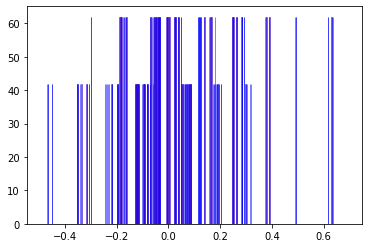

In [8]:
#Sonar
N = 60 #les colonnes
P = 104 #les lignes
etiq = np.loadtxt('/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/etiq_test.txt',dtype='int')
etiq=etiq.reshape((104, 1))
etiq=np.array(etiq,dtype=int)

X_ = np.loadtxt("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/test.txt")

ones = np.ones((len(X_),1))
X_ = np.append(ones,X_,axis=1)
X_=np.array(X_,dtype=float)

N=len(X_[0])
print(N)


#Weights
W_=initialisationHebb(X_,N,etiq)
W_=W_

W_=Minimerror(X_,etiq,W_,8000)

etiqMinimerror=defineTau(X_,W_)



#Compter les erreurs gen et app
NbErr = Error(etiq.flatten(),etiqMinimerror)
Eg=generalisation(P,NbErr)
print("Erreur de généralisation",Eg)
print("Erreur d'apprentissage",NbErr)


print("")
print("Weights sonar")
print(W_)



#Calculer stabilité
Stab_sonar=Stabilite(etiq,W_,X_)
print("Stabilité")
print(Stab_sonar)


print("sonar")

def plotstab(s):
    plt.hist(s, range=(-0.5, 0.7), bins=10, facecolor='red', alpha=0.5,edgecolor='blue')
    plt.show()
print("Plot de Stabilité")
plotstab(Stab_sonar)

**PARTIE** 2

In [9]:
def Minimerror_2(X,etiq,W,iterations):
  
  #Parameters
  iterats=0
  betaplus=0.01
  betamoins=0.001 #(6/0.01)
  delta=0.01
  alpha=0.01
  
  while iterats<=iterations :
      dWp=0
      dWn=0
      
      Wnorm = LA.norm(W)
      
      for i, (Xi, etiqi) in enumerate(zip(X, etiq)):
              Xi = np.atleast_2d(Xi)
              stab= etiqi * np.dot(Xi, W) / Wnorm 
              
              
              #selon la stabilité
              if stab>0:
                  dWp+=     Xi/      (np.cosh(betaplus*stab/2)**2)*etiq[i]
              else :
                   dWn+=     Xi/      (np.cosh(betamoins*stab/2)**2)*etiq[i]
              
              
      dW = - np.add(dWp,dWn) * betaplus / 4
      W -=alpha* dW[0]
      betaplus=betaplus+delta
      betamoins=betamoins+delta
      iterats=iterats+1
  
  return W

Et

(4, 1)
[-0.57735027  0.57735027  0.57735027]
[-1, -1, -1, 1]
Erreur de généralisation 1.0
Erreur d'apprentissage 0
Stabilité
[[ 1.73205081  0.57735027  0.57735027 -0.57735027]
 [ 1.73205081  0.57735027  0.57735027 -0.57735027]
 [ 1.73205081  0.57735027  0.57735027 -0.57735027]
 [-1.73205081 -0.57735027 -0.57735027  0.57735027]]
Plot de Stabilité


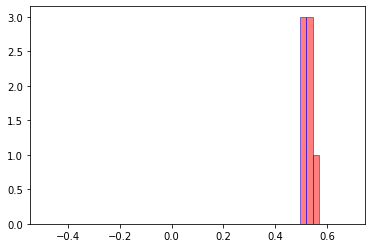

In [10]:
'''ET'''
#X et Y
X_= np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
X_= np.insert(X_,0,1,axis=1)
etiq = np.array([[-1], [-1], [-1], [1]])
print(etiq.shape)


N=len(X_[0])

#Weights
W_=initialisationHebb(X_,N,etiq)
W_=W_
print(W_)



#Trouver etiquetteprédite
Weights=Minimerror_2(X_,etiq,W_,1000)
etiq_et_MinimError2=defineTau(X_,Weights)
print(etiq_et_MinimError2)

#Compter les erreurs gen et app
NbErr = Error(etiq.flatten(),etiq_et_MinimError2)

Eg=generalisation(P,NbErr)
print("Erreur de généralisation",Eg)
print("Erreur d'apprentissage",NbErr)


#Calculer stabilité
Stab_ET=Stabilite(etiq,Weights,X_)
print("Stabilité")
print(Stab_ET)



print("Plot de Stabilité")
plotstab(Stab_ET)

ou

[-1, -1, -1, 1]
Erreur de généralisation 1.0
Erreur d'apprentissage 0
Stabilité
[[ 1.73205081  0.57735027  0.57735027 -0.57735027]
 [-1.73205081 -0.57735027 -0.57735027  0.57735027]
 [-1.73205081 -0.57735027 -0.57735027  0.57735027]
 [-1.73205081 -0.57735027 -0.57735027  0.57735027]]
Plot de Stabilité


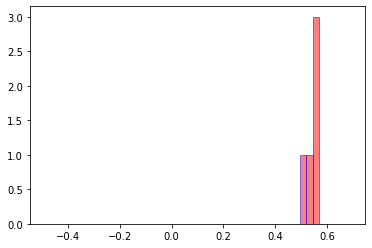

In [11]:
'''ou'''
#X et Y
# construct the OR dataset
X_= np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
X_= np.insert(X_,0,1,axis=1)
etiq_ou = np.array([[-1], [1], [1], [1]])
N=len(X_[0])

#Weights
W_=initialisationHebb(X_,N,etiq)
W_=W_


#Trouver etiquetteprédite
Weights=Minimerror_2(X_,etiq,W_,1000)
etiq_ou_MinimError2=defineTau(X_,Weights)
print(etiq_ou_MinimError2)

#Compter les erreurs gen et app
NbErr = Error(etiq.flatten(),etiq_ou_MinimError2)

Eg=generalisation(P,NbErr)
print("Erreur de généralisation",Eg)
print("Erreur d'apprentissage",NbErr)




#Calculer stabilité
Stab_ou=Stabilite(etiq_ou,Weights,X_)
print("Stabilité")
print(Stab_ou)



print("Plot de Stabilité")
plotstab(Stab_ou)

Sonar

61
3
Erreur de généralisation 0.9711538461538461
Erreur d'apprentissage 3
[-1.10984103e+02  1.28650980e+01 -1.71416929e+01 -1.10812062e+00
  4.88030821e+01  2.65064328e+01  2.25289503e+01 -3.24755760e+01
  2.47232806e+01  8.73117468e+01  1.03330084e+02  1.51598391e+02
  1.16407203e+02  3.67393772e+01 -7.11130236e+01 -6.13525299e+01
  2.26001495e+01  2.37310241e+01 -6.73337646e+01 -3.66577898e+01
  9.99728775e+00  7.97996485e+01  6.55771467e+01  5.74829644e+01
  1.77904941e+01 -1.02359440e+02 -9.07353311e+01  1.66738570e+01
  6.47858584e+01  8.84121511e+00 -4.79476680e+01 -4.89195147e+01
  7.03471154e+01 -1.55328581e+00 -4.61889683e+01 -2.95126784e+00
 -9.39934350e+01 -9.26770447e+01  7.15546160e+00  1.06108640e+02
 -1.18434966e+01  5.92912588e+01  1.22102747e+01  1.13062243e+02
  1.40898047e+02  7.09857737e+01  7.64872312e+01  5.18180851e+01
  2.14200742e+01  8.20074323e+00  4.71137881e+00  2.28964646e+01
  1.82727918e+01  7.38129835e+00 -1.37454710e+00 -4.31646734e-01
  4.32539427e+00

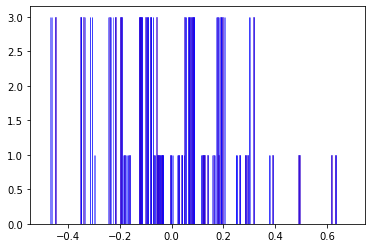

In [12]:
#Les labels 
etiq_sonar = np.loadtxt('/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/etiq_test.txt',dtype='int')
etiq_sonar=etiq_sonar.reshape((104, 1))
etiq_sonar=np.array(etiq_sonar,dtype=int)

#Données X
X_ = np.loadtxt("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/test.txt")
ones = np.ones((len(X_),1))
X_ = np.append(ones,X_,axis=1)
X_=np.array(X_,dtype=float)

#N
N=len(X_[0])
print(N)


#Weights
W_=initialisationHebb(X_,N,etiq_sonar)
W_=W_

Weights=Minimerror_2(X_,etiq_sonar,W_,8000)



#Trouver etiquetteprédite
etiq_sonar_predicted_MinimError2=defineTau(X_,Weights)
etiq_sonar_predicted_MinimError2=np.array(etiq_sonar_predicted_MinimError2,dtype=int)


#Compter les erreurs gen et app
NbErr = Error(etiq_sonar.flatten(),etiq_sonar_predicted_MinimError2)
print(NbErr)
Eg=generalisation(P,NbErr)
print("Erreur de généralisation",Eg)
print("Erreur d'apprentissage",NbErr)

#les poids
print(Weights)

#Calculer stabilité
Stab_sonar=Stabilite(etiq,Weights,X_)
print("Stabilité")
print(Stab_sonar)


print("sonar")

def plotstab(s):
    plt.hist(s, range=(-0.5, 0.7), bins=10, facecolor='red', alpha=0.5,edgecolor='blue')
    plt.show()
print("Plot de Stabilité")
plotstab(Stab_sonar)